# Assignment 2 - Gesture Based UI

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# CNN From Scratch - Default Image Colour
Image size = 128 x 128<br/>
Image colour = RGB<br/>



In [77]:
# Define constants
IMAGE_SIZE = (128, 128) #Image size of 128 x 128
BATCH_SIZE = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [78]:
# This code sets up two TensorFlow Keras image datasets for training and validation/testing. The `train_dataset` is created from the 
# `DATASET_PATH` directory, with a 70/30 split for training and validation data. The `validation_and_test_dataset` is also created from
# the `DATASET_PATH` directory, with the same 70/30 split. The `test_dataset` is then created by taking the last 2/3 of the `validation_and_test_dataset`,
# and the `validation_dataset` is created by skipping the last 2/3 of the `validation_and_test_dataset`.
train_dataset = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE)

validation_and_test_dataset = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE)

val_batches = tf.data.experimental.cardinality(validation_and_test_dataset)

test_dataset = validation_and_test_dataset.take((2*val_batches) // 3)
validation_dataset = validation_and_test_dataset.skip((2*val_batches) // 3) 


Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [79]:
# Get the number of classes from the data generator
NUM_CLASSES = len(train_dataset.class_names)
print("Classes: ",NUM_CLASSES)

Classes:  18


In [80]:
# CNN model from scratch
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 64)      

In [82]:

# Configures an EarlyStopping callback for a Keras model.

# This callback monitors the validation loss during training and stops the training
# if the validation loss does not improve for 5 epochs. It also restores the
# weights of the model to the best performing weights during training.

# Args:
#     monitor (str): The metric to monitor for early stopping. In this case, it is
#         set to 'val_loss', which means the validation loss.
#     patience (int): The number of epochs to wait before stopping the training if
#         the monitored metric does not improve.
#     restore_best_weights (bool): If True, the model will be restored to the
#         weights that had the best value of the monitored metric.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [83]:
# Trains the model on the provided training dataset and evaluates it on the validation dataset. The training runs for 10 epochs and uses the provided callback function to monitor and control the training process.

# Parameters:
# - train_dataset (tf.data.Dataset): The training dataset.
# - validation_dataset (tf.data.Dataset): The validation dataset.
# - epochs (int): The number of training epochs.
# - callbacks (list): A list of callback functions to use during training.
history = model.fit(train_dataset,  validation_data=(validation_dataset), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 33s 12ms/step - loss: 2.7755 - accuracy: 0.0989 - val_loss: 2.6109 - val_accuracy: 0.1426
Epoch 2/10
2755/2755 [==============================] - 29s 10ms/step - loss: 2.5379 - accuracy: 0.1691 - val_loss: 2.4577 - val_accuracy: 0.1924
Epoch 3/10
2755/2755 [==============================] - 29s 10ms/step - loss: 2.3604 - accuracy: 0.2282 - val_loss: 2.3234 - val_accuracy: 0.2437
Epoch 4/10
2755/2755 [==============================] - 29s 10ms/step - loss: 2.1820 - accuracy: 0.2862 - val_loss: 2.1336 - val_accuracy: 0.3060
Epoch 5/10
2755/2755 [==============================] - 29s 10ms/step - loss: 2.0141 - accuracy: 0.3418 - val_loss: 1.9474 - val_accuracy: 0.3589
Epoch 6/10
2755/2755 [==============================] - 29s 10ms/step - loss: 1.8613 - accuracy: 0.3914 - val_loss: 1.8359 - val_accuracy: 0.3950
Epoch 7/10
2755/2755 [==============================] - 29s 10ms/step - loss: 1.7273 - accuracy: 0.4343 - val_loss: 1.6653 -

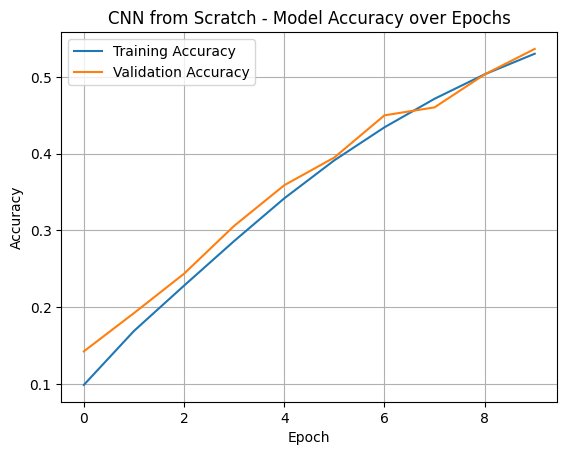

In [84]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN from Scratch - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
# Evaluates the model on the test dataset and returns a dictionary of evaluation metrics.
model.evaluate(test_dataset, return_dict=True)

787/787 [==============================] - 5s 6ms/step - loss: 1.4027 - accuracy: 0.5397


{'loss': 1.4026548862457275, 'accuracy': 0.5396680235862732}

In [86]:
class_names = train_dataset.class_names

# Prediction of My Hand Peace
my_image1 = np.array(Image.open("MyHandPeace.jpg").resize((IMAGE_SIZE[0],IMAGE_SIZE[1])))
my_image1 = my_image1.reshape(1,IMAGE_SIZE[0],IMAGE_SIZE[1],3)
prediction_of_my_image = model.predict(my_image1)
my_image1_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My hand Palm
my_image2 = np.array(Image.open("MyHandPalm.jpg").resize((IMAGE_SIZE[0],IMAGE_SIZE[1])))
my_image2 = my_image2.reshape(1,IMAGE_SIZE[0],IMAGE_SIZE[1],3)
prediction_of_my_image = model.predict(my_image2)
my_image2_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Stop 
my_image3 = np.array(Image.open("MyHandStop.jpg").resize((IMAGE_SIZE[0],IMAGE_SIZE[1])))
my_image3 = my_image3.reshape(1,IMAGE_SIZE[0],IMAGE_SIZE[1],3)
prediction_of_my_image = model.predict(my_image3)
my_image3_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Two Up
my_image4 = np.array(Image.open("MyHandTwoUp.jpg").resize((IMAGE_SIZE[0],IMAGE_SIZE[1])))
my_image4 = my_image4.reshape(1,IMAGE_SIZE[0],IMAGE_SIZE[1],3)
prediction_of_my_image = model.predict(my_image4)
my_image4_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Print the predicted class names
print("Predicted Class for MyHandPeace.jpg   (Should predict peace): ", my_image1_prediction)
print("Predicted Class for MyHandPalm.jpg     (Should predict Palm): ", my_image2_prediction)
print("Predicted Class for MyHandStop.jpg     (Should predict Stop): ", my_image3_prediction)
print("Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up): ", my_image4_prediction)


1/1 [==============================] - 0s 9ms/step
Predicted Class for MyHandPeace.jpg   (Should predict peace):  peace
Predicted Class for MyHandPalm.jpg     (Should predict Palm):  palm
Predicted Class for MyHandStop.jpg     (Should predict Stop):  stop
Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up):  two_up


# CNN from Scratch - RGB Images - More Convolutional Layers and Increased Filters

- The previous model doesn't have a great accuracy, lets try and improve it by adding some layers and increasing the filters in the convolutional layers

In [87]:
# Define constants
IMAGE_SIZE1 = (128, 128) #Image size of 128 x 128
BATCH_SIZE1 = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [88]:
train_dataset1 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE1, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE1)

validation_and_test_dataset1 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE1, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE1)

val_batches1 = tf.data.experimental.cardinality(validation_and_test_dataset1)

test_dataset1 = validation_and_test_dataset1.take((2*val_batches1) // 3)
validation_dataset1 = validation_and_test_dataset1.skip((2*val_batches1) // 3) 


Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [89]:
# Get the number of classes from the data generator
NUM_CLASSES = len(train_dataset1.class_names)
print("Classes: ",NUM_CLASSES)

Classes:  18


In [90]:
# CNN model from scratch
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.Input(shape=(IMAGE_SIZE1[0], IMAGE_SIZE1[1],3)))
model1.add(layers.Rescaling(1./255))
model1.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(48, 3, padding='same', activation='relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(96, 3, padding='same', activation='relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.GlobalAveragePooling2D())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [91]:
#model1.fit(train_dataset1,  validation_data=(validation_dataset1), epochs=10, callbacks=[callback])
history1 = model1.fit(train_dataset1, validation_data=(validation_dataset1), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 41s 15ms/step - loss: 2.5847 - accuracy: 0.1550 - val_loss: 2.1557 - val_accuracy: 0.2877
Epoch 2/10
2755/2755 [==============================] - 40s 14ms/step - loss: 1.7232 - accuracy: 0.4318 - val_loss: 1.3318 - val_accuracy: 0.5612
Epoch 3/10
2755/2755 [==============================] - 40s 14ms/step - loss: 1.1225 - accuracy: 0.6363 - val_loss: 0.9599 - val_accuracy: 0.6943
Epoch 4/10
2755/2755 [==============================] - 39s 14ms/step - loss: 0.8271 - accuracy: 0.7336 - val_loss: 0.7655 - val_accuracy: 0.7576
Epoch 5/10
2755/2755 [==============================] - 39s 14ms/step - loss: 0.6704 - accuracy: 0.7847 - val_loss: 0.6454 - val_accuracy: 0.7914
Epoch 6/10
2755/2755 [==============================] - 39s 14ms/step - loss: 0.5654 - accuracy: 0.8187 - val_loss: 0.5795 - val_accuracy: 0.8136
Epoch 7/10
2755/2755 [==============================] - 39s 14ms/step - loss: 0.4950 - accuracy: 0.8410 - val_loss: 0.5538 -

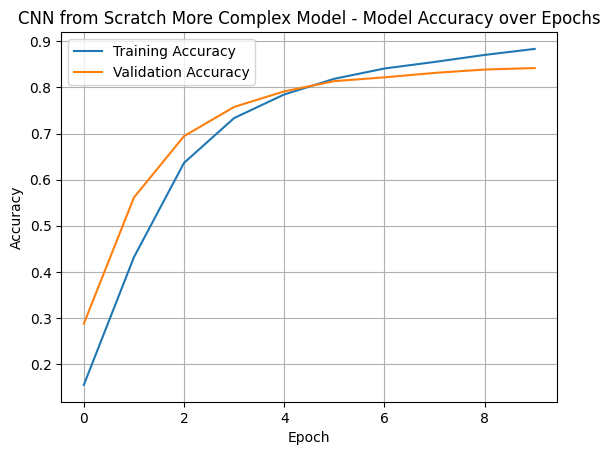

In [92]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN from Scratch More Complex Model - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [93]:
model1.evaluate(test_dataset1, return_dict=True)

787/787 [==============================] - 6s 8ms/step - loss: 0.4889 - accuracy: 0.8482


{'loss': 0.4889015555381775, 'accuracy': 0.8482369780540466}

In [94]:
class_names = train_dataset1.class_names

# Prediction of My Hand Peace
my_image1 = np.array(Image.open("MyHandPeace.jpg").resize((IMAGE_SIZE1[0],IMAGE_SIZE1[1])))
my_image1 = my_image1.reshape(1,IMAGE_SIZE1[0],IMAGE_SIZE1[1],3)
prediction_of_my_image = model1.predict(my_image1)
my_image1_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My hand Palm
my_image2 = np.array(Image.open("MyHandPalm.jpg").resize((IMAGE_SIZE1[0],IMAGE_SIZE1[1])))
my_image2 = my_image2.reshape(1,IMAGE_SIZE1[0],IMAGE_SIZE1[1],3)
prediction_of_my_image = model1.predict(my_image2)
my_image2_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Stop 
my_image3 = np.array(Image.open("MyHandStop.jpg").resize((IMAGE_SIZE1[0],IMAGE_SIZE1[1])))
my_image3 = my_image3.reshape(1,IMAGE_SIZE1[0],IMAGE_SIZE1[1],3)
prediction_of_my_image = model1.predict(my_image3)
my_image3_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Two Up
my_image4 = np.array(Image.open("MyHandTwoUp.jpg").resize((IMAGE_SIZE1[0],IMAGE_SIZE1[1])))
my_image4 = my_image4.reshape(1,IMAGE_SIZE1[0],IMAGE_SIZE1[1],3)
prediction_of_my_image = model1.predict(my_image4)
my_image4_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Print the predicted class names
print("Predicted Class for MyHandPeace.jpg   (Should predict peace): ", my_image1_prediction)
print("Predicted Class for MyHandPalm.jpg     (Should predict Palm): ", my_image2_prediction)
print("Predicted Class for MyHandStop.jpg     (Should predict Stop): ", my_image3_prediction)
print("Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up): ", my_image4_prediction)


1/1 [==============================] - 0s 9ms/step
Predicted Class for MyHandPeace.jpg   (Should predict peace):  peace
Predicted Class for MyHandPalm.jpg     (Should predict Palm):  palm
Predicted Class for MyHandStop.jpg     (Should predict Stop):  stop
Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up):  two_up


# CNN from Scatch - Grayscale Images

In [95]:
# Define constants
IMAGE_SIZE2 = (128, 128) #Image size of 128 x 128
BATCH_SIZE2 = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [96]:
# This code sets up two TensorFlow Keras image datasets for training and validation/testing. The `train_dataset` is created from the 
# `DATASET_PATH` directory, with a 70/30 split for training and validation data. The `validation_and_test_dataset` is also created from
# the `DATASET_PATH` directory, with the same 70/30 split. The `test_dataset` is then created by taking the last 2/3 of the `validation_and_test_dataset`,
# and the `validation_dataset` is created by skipping the last 2/3 of the `validation_and_test_dataset`.
train_dataset_grayscale = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            color_mode = "grayscale",
                                                            image_size=IMAGE_SIZE2, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE2)
NUM_CLASSES = len(train_dataset_grayscale.class_names)
CLASS_NAMES = train_dataset_grayscale.class_names

validation_and_test_dataset_grayscale = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            color_mode="grayscale",
                                                            image_size=IMAGE_SIZE2, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE2)

val_batches = tf.data.experimental.cardinality(validation_and_test_dataset_grayscale)

test_dataset_grayscale = validation_and_test_dataset_grayscale.take((2*val_batches) // 3)

validation_dataset_grayscale = validation_and_test_dataset_grayscale.skip((2*val_batches) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [97]:
# CNN model from scratch
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(IMAGE_SIZE2[0], IMAGE_SIZE2[1],1)))
model2.add(layers.Rescaling(1./255))
model2.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(48, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(96, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


flatten had it over fitting

In [98]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [99]:
history2 = model2.fit(train_dataset_grayscale,  validation_data=(validation_dataset_grayscale), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 37s 13ms/step - loss: 2.7064 - accuracy: 0.1161 - val_loss: 2.4481 - val_accuracy: 0.2067
Epoch 2/10
2755/2755 [==============================] - 36s 13ms/step - loss: 2.2154 - accuracy: 0.2698 - val_loss: 1.9850 - val_accuracy: 0.3440
Epoch 3/10
2755/2755 [==============================] - 34s 12ms/step - loss: 1.8018 - accuracy: 0.4053 - val_loss: 1.6359 - val_accuracy: 0.4753
Epoch 4/10
2755/2755 [==============================] - 34s 12ms/step - loss: 1.4592 - accuracy: 0.5232 - val_loss: 1.4244 - val_accuracy: 0.5564
Epoch 5/10
2755/2755 [==============================] - 36s 13ms/step - loss: 1.2204 - accuracy: 0.6055 - val_loss: 1.2262 - val_accuracy: 0.6076
Epoch 6/10
2755/2755 [==============================] - 36s 13ms/step - loss: 1.0514 - accuracy: 0.6618 - val_loss: 1.0411 - val_accuracy: 0.6703
Epoch 7/10
2755/2755 [==============================] - 36s 13ms/step - loss: 0.9218 - accuracy: 0.7031 - val_loss: 0.9568 -

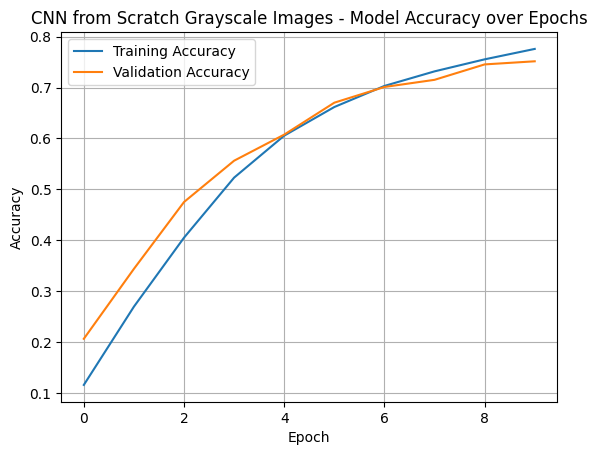

In [100]:
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN from Scratch Grayscale Images - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 128, 128, 1)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 48)      

In [102]:
model2.evaluate(test_dataset_grayscale, return_dict=True)

787/787 [==============================] - 4s 6ms/step - loss: 0.7954 - accuracy: 0.7527


{'loss': 0.7954080104827881, 'accuracy': 0.7527398467063904}

In [103]:
# Load and preprocess the image
my_image1 = Image.open("MyHandStop.jpg").resize((IMAGE_SIZE2[0], IMAGE_SIZE2[1]))
my_image2 = Image.open("MyHandPeace.jpg").resize((IMAGE_SIZE2[0], IMAGE_SIZE2[1]))
my_image3 = Image.open("MyHandTwoUp.jpg").resize((IMAGE_SIZE2[0], IMAGE_SIZE2[1]))
my_image4 = Image.open("MyHandPalm.jpg").resize((IMAGE_SIZE2[0], IMAGE_SIZE2[1]))
# Convert the image to grayscale if necessary
my_image1 = my_image1.convert("L")
my_image2 = my_image2.convert("L")
my_image3 = my_image3.convert("L")
my_image4 = my_image4.convert("L")
# Convert the image to numpy array
my_image_array1 = np.array(my_image1)
my_image_array2 = np.array(my_image2)
my_image_array3 = np.array(my_image3)
my_image_array4 = np.array(my_image4)
# Expand dimensions to match the model's input shape
my_image_array1 = np.expand_dims(my_image_array1, axis=0)
my_image_array1 = np.expand_dims(my_image_array1, axis=-1)

my_image_array2 = np.expand_dims(my_image_array2, axis=0)
my_image_array2 = np.expand_dims(my_image_array2, axis=-1)

my_image_array3 = np.expand_dims(my_image_array3, axis=0)
my_image_array3 = np.expand_dims(my_image_array3, axis=-1)

my_image_array4 = np.expand_dims(my_image_array4, axis=0)
my_image_array4 = np.expand_dims(my_image_array4, axis=-1)
# Predict the class probabilities
prediction_of_my_image1 = model2.predict(my_image_array1)
prediction_of_my_image2 = model2.predict(my_image_array2)
prediction_of_my_image3 = model2.predict(my_image_array3)
prediction_of_my_image4 = model2.predict(my_image_array4)
# Get the index of the predicted class (the class with the highest probability)
predicted_class_index1 = np.argmax(prediction_of_my_image1)
predicted_class_index2 = np.argmax(prediction_of_my_image2)
predicted_class_index3 = np.argmax(prediction_of_my_image3)
predicted_class_index4 = np.argmax(prediction_of_my_image4)
# Map the predicted class index to the corresponding class name


predicted_class_name1 = CLASS_NAMES[predicted_class_index1]
predicted_class_name2 = CLASS_NAMES[predicted_class_index2]
predicted_class_name3 = CLASS_NAMES[predicted_class_index3]
predicted_class_name4 = CLASS_NAMES[predicted_class_index4]

print("Predicted Class for MyHandPeace.jpg   (Should predict peace): ", predicted_class_name2)
print("Predicted Class for MyHandPalm.jpg     (Should predict Palm): ", predicted_class_name4)
print("Predicted Class for MyHandStop.jpg     (Should predict Stop): ", predicted_class_name1)
print("Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up): ", predicted_class_name3)

1/1 [==============================] - 0s 10ms/step
Predicted Class for MyHandPeace.jpg   (Should predict peace):  peace
Predicted Class for MyHandPalm.jpg     (Should predict Palm):  four
Predicted Class for MyHandStop.jpg     (Should predict Stop):  stop
Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up):  two_up


# CNN from Scratch - Smaller Images, Data Augmentation, Different Batch Size, 

In [1]:
# Define constants
IMAGE_SIZE3 = (64, 64) #Image size of 128 x 128
BATCH_SIZE3 = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [105]:
# This code sets up two TensorFlow Keras image datasets for training and validation/testing. The `train_dataset` is created from the 
# `DATASET_PATH` directory, with a 70/30 split for training and validation data. The `validation_and_test_dataset` is also created from
# the `DATASET_PATH` directory, with the same 70/30 split. The `test_dataset` is then created by taking the last 2/3 of the `validation_and_test_dataset`,
# and the `validation_dataset` is created by skipping the last 2/3 of the `validation_and_test_dataset`.
train_dataset3 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE3, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE3)
NUM_CLASSES = len(train_dataset3.class_names)
CLASS_NAMES = train_dataset3.class_names

validation_and_test_dataset3 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE3, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE3)

val_batches3 = tf.data.experimental.cardinality(validation_and_test_dataset3)

test_dataset3 = validation_and_test_dataset3.take((2*val_batches3) // 3)

validation_dataset3 = validation_and_test_dataset3.skip((2*val_batches3) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [106]:

# Applies data augmentation transformations to the input data.

# The `data_augmentation_layers` sequential model applies the following transformations:
# - `RandomFlip("horizontal")`: Randomly flips the input image horizontally.
# - `RandomRotation(0.1)`: Randomly rotates the input image by up to 10 degrees.

# These transformations help increase the diversity of the training data and improve the model's ability to generalize to new, unseen data.

data_augmentation_layers = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [107]:
# CNN model from scratch
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.Input(shape=(IMAGE_SIZE3[0], IMAGE_SIZE3[1],3)))
model3.add(data_augmentation_layers)
model3.add(layers.Rescaling(1./255))
model3.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.Conv2D(48, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.Conv2D(96, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.GlobalAveragePooling2D())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [108]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [109]:
history3 = model3.fit(train_dataset3,  validation_data=(validation_dataset3), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 280s 101ms/step - loss: 2.7534 - accuracy: 0.1075 - val_loss: 2.4925 - val_accuracy: 0.1945
Epoch 2/10
2755/2755 [==============================] - 139s 50ms/step - loss: 2.1192 - accuracy: 0.3119 - val_loss: 1.5897 - val_accuracy: 0.4835
Epoch 3/10
2755/2755 [==============================] - 146s 53ms/step - loss: 1.5835 - accuracy: 0.4871 - val_loss: 1.2530 - val_accuracy: 0.5856
Epoch 4/10
2755/2755 [==============================] - 138s 50ms/step - loss: 1.3114 - accuracy: 0.5739 - val_loss: 1.0960 - val_accuracy: 0.6487
Epoch 5/10
2755/2755 [==============================] - 153s 55ms/step - loss: 1.1463 - accuracy: 0.6278 - val_loss: 0.9587 - val_accuracy: 0.6857
Epoch 6/10
2755/2755 [==============================] - 139s 50ms/step - loss: 1.0217 - accuracy: 0.6689 - val_loss: 0.8886 - val_accuracy: 0.7122
Epoch 7/10
2755/2755 [==============================] - 139s 51ms/step - loss: 0.9384 - accuracy: 0.6950 - val_loss: 

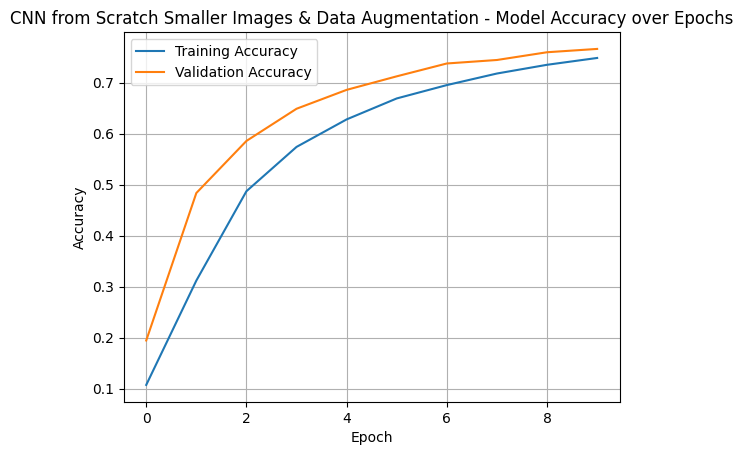

In [110]:
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN from Scratch Smaller Images & Data Augmentation - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
model3.evaluate(test_dataset3, return_dict=True)

787/787 [==============================] - 4s 5ms/step - loss: 0.7059 - accuracy: 0.7687


{'loss': 0.7059276700019836, 'accuracy': 0.7687023282051086}

In [112]:
class_names = train_dataset3.class_names

# Prediction of My Hand Peace
my_image1 = np.array(Image.open("MyHandPeace.jpg").resize((IMAGE_SIZE3[0],IMAGE_SIZE3[1])))
my_image1 = my_image1.reshape(1,IMAGE_SIZE3[0],IMAGE_SIZE3[1],3)
prediction_of_my_image = model3.predict(my_image1)
my_image1_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My hand Palm
my_image2 = np.array(Image.open("MyHandPalm.jpg").resize((IMAGE_SIZE3[0],IMAGE_SIZE3[1])))
my_image2 = my_image2.reshape(1,IMAGE_SIZE3[0],IMAGE_SIZE3[1],3)
prediction_of_my_image = model3.predict(my_image2)
my_image2_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Stop 
my_image3 = np.array(Image.open("MyHandStop.jpg").resize((IMAGE_SIZE3[0],IMAGE_SIZE3[1])))
my_image3 = my_image3.reshape(1,IMAGE_SIZE3[0],IMAGE_SIZE3[1],3)
prediction_of_my_image = model3.predict(my_image3)
my_image3_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Two Up
my_image4 = np.array(Image.open("MyHandTwoUp.jpg").resize((IMAGE_SIZE3[0],IMAGE_SIZE3[1])))
my_image4 = my_image4.reshape(1,IMAGE_SIZE3[0],IMAGE_SIZE3[1],3)
prediction_of_my_image = model3.predict(my_image4)
my_image4_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Print the predicted class names
print("Predicted Class for MyHandPeace.jpg   (Should predict peace): ", my_image1_prediction)
print("Predicted Class for MyHandPalm.jpg     (Should predict Palm): ", my_image2_prediction)
print("Predicted Class for MyHandStop.jpg     (Should predict Stop): ", my_image3_prediction)
print("Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up): ", my_image4_prediction)


1/1 [==============================] - 0s 10ms/step
Predicted Class for MyHandPeace.jpg   (Should predict peace):  peace
Predicted Class for MyHandPalm.jpg     (Should predict Palm):  four
Predicted Class for MyHandStop.jpg     (Should predict Stop):  stop
Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up):  two_up


# Transfer Learning - 128 Image Size with Data Augmentation

In [6]:
# Define constants
IMAGE_SIZE_TRANSFERLEARNING = (128, 128) #Image size of 128 x 128
BATCH_SIZE_TF = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [7]:
# This code sets up two TensorFlow Keras image datasets for training and validation/testing. The `train_dataset` is created from the 
# `DATASET_PATH` directory, with a 70/30 split for training and validation data. The `validation_and_test_dataset` is also created from
# the `DATASET_PATH` directory, with the same 70/30 split. The `test_dataset` is then created by taking the last 2/3 of the `validation_and_test_dataset`,
# and the `validation_dataset` is created by skipping the last 2/3 of the `validation_and_test_dataset`.
train_datasettf = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE_TRANSFERLEARNING, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE_TF)
NUM_CLASSES_TF = len(train_datasettf.class_names)
CLASS_NAMES_TF = train_datasettf.class_names

validation_and_test_datasettf = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE_TRANSFERLEARNING, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE_TF)

val_batchestf = tf.data.experimental.cardinality(validation_and_test_datasettf)

test_datasettf = validation_and_test_datasettf.take((2*val_batchestf) // 3)

validation_datasettf = validation_and_test_datasettf.skip((2*val_batchestf) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [8]:
data_augmentation_layerstf = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [9]:
inputs = tf.keras.Input(shape=(IMAGE_SIZE_TRANSFERLEARNING[0], IMAGE_SIZE_TRANSFERLEARNING[1],3))

In [10]:
model_transferlearning = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMAGE_SIZE_TRANSFERLEARNING[0], IMAGE_SIZE_TRANSFERLEARNING[1],3),
    include_top=False)
model_transferlearning.trainable = False
x = data_augmentation_layerstf(inputs)
x = tf.keras.applications.xception.preprocess_input(x)
x = model_transferlearning(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES_TF)(x)
modeltf = tf.keras.Model(inputs, outputs)

In [11]:
modeltf.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
historytf = modeltf.fit(train_datasettf,  validation_data=(validation_datasettf), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 209s 74ms/step - loss: 2.2687 - accuracy: 0.3093 - val_loss: 1.8806 - val_accuracy: 0.4386
Epoch 2/10
2755/2755 [==============================] - 180s 65ms/step - loss: 1.9728 - accuracy: 0.3916 - val_loss: 1.7391 - val_accuracy: 0.4753
Epoch 3/10
2755/2755 [==============================] - 182s 66ms/step - loss: 1.9121 - accuracy: 0.4069 - val_loss: 1.6779 - val_accuracy: 0.4895
Epoch 4/10
2755/2755 [==============================] - 184s 67ms/step - loss: 1.8792 - accuracy: 0.4149 - val_loss: 1.6398 - val_accuracy: 0.5035
Epoch 5/10
2755/2755 [==============================] - 182s 66ms/step - loss: 1.8631 - accuracy: 0.4184 - val_loss: 1.6195 - val_accuracy: 0.5068
Epoch 6/10
2755/2755 [==============================] - 185s 67ms/step - loss: 1.8546 - accuracy: 0.4198 - val_loss: 1.6080 - val_accuracy: 0.5085
Epoch 7/10
2755/2755 [==============================] - 181s 66ms/step - loss: 1.8471 - accuracy: 0.4235 - val_loss: 1

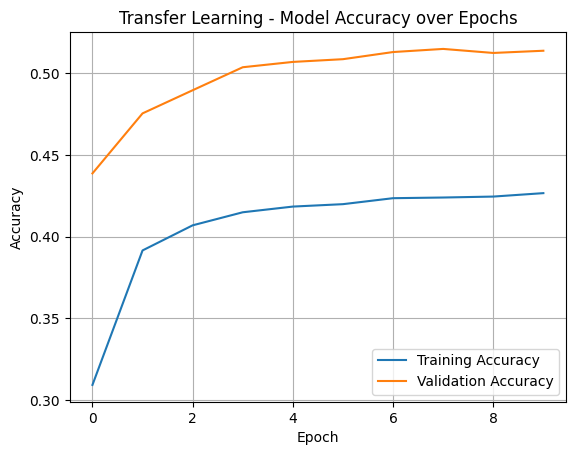

In [14]:
plt.plot(historytf.history['accuracy'], label='Training Accuracy')
plt.plot(historytf.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
modeltf.evaluate(test_datasettf, return_dict=True)

787/787 [==============================] - 18s 23ms/step - loss: 1.5692 - accuracy: 0.5174


{'loss': 1.5692437887191772, 'accuracy': 0.517352283000946}

epoch ten transfer learning: val_accuracy: 0.3462

# Transfer Learning - 64x64

In [47]:
# Define constants
IMAGE_SIZE_TRANSFERLEARNING1 = (224, 224) #Image size of 128 x 128
BATCH_SIZE_TF1 = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [48]:
train_datasettf1 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE_TRANSFERLEARNING1, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE_TF1)
NUM_CLASSES_TF = len(train_datasettf1.class_names)
CLASS_NAMES_TF = train_datasettf1.class_names

validation_and_test_datasettf1 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE_TRANSFERLEARNING1, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE_TF1)

val_batchestf1 = tf.data.experimental.cardinality(validation_and_test_datasettf1)

test_datasettf1 = validation_and_test_datasettf1.take((2*val_batchestf1) // 3)

validation_datasettf1 = validation_and_test_datasettf1.skip((2*val_batchestf1) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [49]:
data_augmentation_layerstf1 = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [50]:
inputs1 = tf.keras.Input(shape=(IMAGE_SIZE_TRANSFERLEARNING1[0], IMAGE_SIZE_TRANSFERLEARNING1[1],3))

In [51]:
model_transferlearning1 = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMAGE_SIZE_TRANSFERLEARNING1[0], IMAGE_SIZE_TRANSFERLEARNING1[1],3),
    include_top=False)
model_transferlearning1.trainable = False
x = data_augmentation_layerstf1(inputs1)
x = tf.keras.applications.xception.preprocess_input(x)
x = model_transferlearning1(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs1 = tf.keras.layers.Dense(NUM_CLASSES_TF)(x)
modeltf1 = tf.keras.Model(inputs1, outputs1)

In [52]:
modeltf1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [54]:
historytf1 = modeltf1.fit(train_datasettf1,  validation_data=(validation_datasettf1), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 311s 112ms/step - loss: 2.3463 - accuracy: 0.2998 - val_loss: 1.9511 - val_accuracy: 0.4534
Epoch 2/10
2755/2755 [==============================] - 303s 110ms/step - loss: 1.9855 - accuracy: 0.4029 - val_loss: 1.7290 - val_accuracy: 0.5127
Epoch 3/10
2755/2755 [==============================] - 304s 110ms/step - loss: 1.8698 - accuracy: 0.4315 - val_loss: 1.6232 - val_accuracy: 0.5350
Epoch 4/10
2755/2755 [==============================] - 297s 108ms/step - loss: 1.8147 - accuracy: 0.4444 - val_loss: 1.5606 - val_accuracy: 0.5492
Epoch 5/10
2755/2755 [==============================] - 289s 105ms/step - loss: 1.7763 - accuracy: 0.4523 - val_loss: 1.5137 - val_accuracy: 0.5603
Epoch 6/10
2755/2755 [==============================] - 307s 111ms/step - loss: 1.7576 - accuracy: 0.4568 - val_loss: 1.4816 - val_accuracy: 0.5655
Epoch 7/10
2755/2755 [==============================] - 646s 235ms/step - loss: 1.7372 - accuracy: 0.4612 - val_

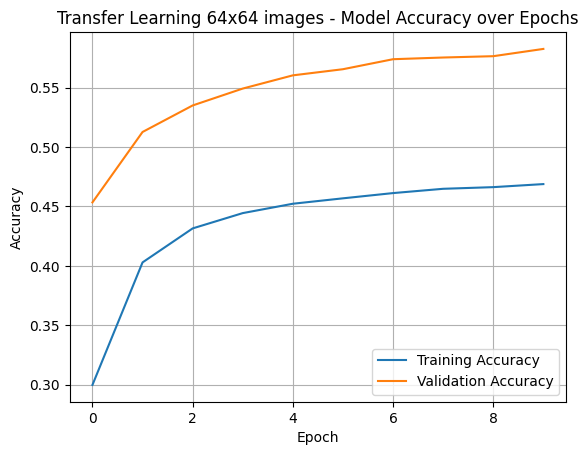

In [55]:
plt.plot(historytf1.history['accuracy'], label='Training Accuracy')
plt.plot(historytf1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning 64x64 images - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
modeltf1.evaluate(test_datasettf1, return_dict=True)

787/787 [==============================] - 66s 84ms/step - loss: 1.4122 - accuracy: 0.5815


{'loss': 1.412248969078064, 'accuracy': 0.5814803242683411}